In [1]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
datagen=ImageDataGenerator(
    rescale=1.0/64,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

In [3]:
df_vehicles="/kaggle/input/vehicle-detection-image-set/data/vehicles"

In [4]:
new_data_img=[]
for img in os.listdir(df_vehicles):
    data=os.path.join(df_vehicles,img)
    cv=cv2.imread(data)
    cv3=cv2.resize(cv,(56,56))
    new_data_img.append(cv3)
new_data_img=np.array(new_data_img)

In [5]:
train_data=datagen.flow_from_directory(
    df_vehicles,
    class_mode=None,
    target_size=(56,56),
    batch_size=32,
    subset="training"
)
val_data=datagen.flow_from_directory(
    df_vehicles,
    class_mode=None,
    target_size=(56,56),
    batch_size=32,
    subset="validation"
)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [6]:
img=next(train_data)

In [7]:
img.shape

(0, 56, 56, 3)

# # Deep learning

In [8]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Input,Dropout,BatchNormalization,Conv2DTranspose
from keras.models import Model
from keras.initializers import HeNormal
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [9]:
early_stopping=EarlyStopping(
monitor='val_loss',
patience=5,
verbose=1,
restore_best_weights=True)

In [10]:
inputs=Input(shape=(56,56,3))
C=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)
M=MaxPooling2D(pool_size=(2,2),strides=(2,2))(B)

C=Conv2D(64,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(M)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)
M=MaxPooling2D(pool_size=(2,2),strides=(2,2))(B)

C=Conv2D(128,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(M)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)
M=MaxPooling2D(pool_size=(2,2),strides=(2,2))(B)

C=Conv2D(256,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(M)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)


C=Conv2DTranspose(128,(3,3),strides=(2,2),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(B)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)
C=Conv2DTranspose(64,(3,3),strides=(2,2),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(B)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)
# M=MaxPooling2D(pool_size=(2,2),strides=(2,2))(B)

C=Conv2DTranspose(32,(3,3),strides=(2,2),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(B)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)
# C=Conv2DTranspose(,(3,3),strides=(2,2),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(B)
# D=Dropout(0.5)(C)
# B=BatchNormalization()(D)

outputs=Conv2D(3,(3,3),padding="same",activation="softmax")(B)
model=Model(inputs,outputs)
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 56, 56, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 56, 56, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 779,395 (2.97 MB)

 Trainable params: 777,987 (2.97 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [11]:
model.fit(new_data_img,new_data_img,epochs=50,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/50


I0000 00:00:1727539730.046144   22022 service.cc:145] XLA service 0x78faec003a30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727539730.046200   22022 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 16/220 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 9414.3066 - mae: 75.9399

I0000 00:00:1727539743.452217   22022 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


220/220 ━━━━━━━━━━━━━━━━━━━━ 36s 80ms/step - loss: 9273.6445 - mae: 75.1279 - val_loss: 9360.7168 - val_mae: 75.3828
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9226.6250 - mae: 74.7944 - val_loss: 9357.3027 - val_mae: 75.3828
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9285.4746 - mae: 75.1775 - val_loss: 9356.8750 - val_mae: 75.3828
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9247.7578 - mae: 74.9932 - val_loss: 9356.8594 - val_mae: 75.3828
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9297.7617 - mae: 75.1465 - val_loss: 9356.8213 - val_mae: 75.3828
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9275.3027 - mae: 75.0389 - val_loss: 9356.7344 - val_mae: 75.3828
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9303.2275 - mae: 75.2909 - val_loss: 9356.6787 - val_mae: 75.3828
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9295.8662 - mae: 75.1491 - val_loss: 9356.8330 - val_mae: 75

In [13]:
df_non_veh=cv2.imread("/kaggle/input/vehicle-detection-image-set/data/non-vehicles/extra100.png")
df_non=cv2.resize(df_non_veh,(56,56))
expand_df=np.expand_dims(df_non,axis=0)
pred=model.predict(expand_df
                  )
reconstruction_error=np.mean(np.square(expand_df - pred))
threshold=np.mean(reconstruction_error)+2*np.std(reconstruction_error)
label2=np.where(reconstruction_error>threshold,0,1)
accuracy=np.mean(label2==1)*100
print(accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
100.0


In [14]:
df_non_veh=cv2.imread("/kaggle/input/vehicle-detection-image-set/data/non-vehicles/extra100.png")
df_non=cv2.resize(df_non_veh,(56,56))

In [54]:
df_non_veh=cv2.imread("/kaggle/input/vehicle-detection-image-set/data/non-vehicles/extra1004.png")
df_non=cv2.resize(df_non_veh,(56,56))
expand_df=np.expand_dims(df_non,axis=0)
pred2=model.predict(expand_df
                  )
reconstruction_error1=np.mean(np.square(df_non - pred2[0]))



threshold=np.mean(np.array(reconstruction_error1)+2*np.std(reconstruction_error1))

label=np.where(reconstruction_error1>threshold,0,1)
# accuracy=np.mean(label==1)*100
# print(accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
100.0


In [56]:
label = 1 if reconstruction_error1 <= threshold else 0  

accuracy = label * 100
accuracy

100

In [57]:
accuracy

100

In [47]:
reconstruction_error1

4176.108

In [48]:
threshold

4176.10791015625

In [16]:
resemblance_percentage = max(0, 100 - (label2 / threshold) * 100)
resemblance_percentage = min(100, resemblance_percentage)

In [17]:
resemblance_percentage

99.97609009271744

In [18]:
df_non.shape

(56, 56, 3)

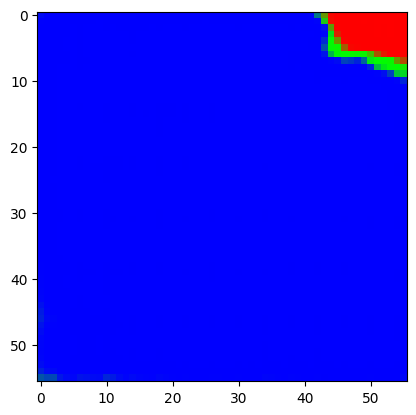

In [19]:
plt.imshow(pred[0])
plt.show()

In [33]:
import numpy as np
import cv2

def calculate_reconstruction_error(original, reconstructed):
    original_flat = original.flatten()
    reconstructed_flat = reconstructed.flatten()
    
    mse = np.mean(np.square(original_flat - reconstructed_flat))
    return mse

def calculate_ressemblance(model, test_image, normal_images):
    test_image_resized = cv2.resize(test_image, (56, 56))
    test_image_expanded = np.expand_dims(test_image_resized, axis=0)
    
    reconstructed_image = model.predict(test_image_expanded)[0]
    
    test_image_error = calculate_reconstruction_error(test_image_resized, reconstructed_image)
    
    normal_reconstruction_errors = []
    for normal_image in normal_images:
        normal_image_resized = cv2.resize(normal_image, (56, 56))
        normal_image_expanded = np.expand_dims(normal_image_resized, axis=0)
        normal_reconstructed = model.predict(normal_image_expanded)[0]
        normal_error = calculate_reconstruction_error(normal_image_resized, normal_reconstructed)
        normal_reconstruction_errors.append(normal_error)
    
    threshold = np.mean(normal_reconstruction_errors) + 2 * np.std(normal_reconstruction_errors)
    
    resemblance_percentage = max(0, 100 - (test_image_error / threshold) * 100)
    resemblance_percentage = min(100, resemblance_percentage)  
    
    return resemblance_percentage

test_image = cv2.imread("/kaggle/input/vehicle-detection-image-set/data/vehicles/10.png")
normal_images =new_data_img[0:10]

resemblance = calculate_ressemblance(model, test_image, normal_images)

print(f"Resemblance to original data: {resemblance:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Resemblance to original data: 77.80%
